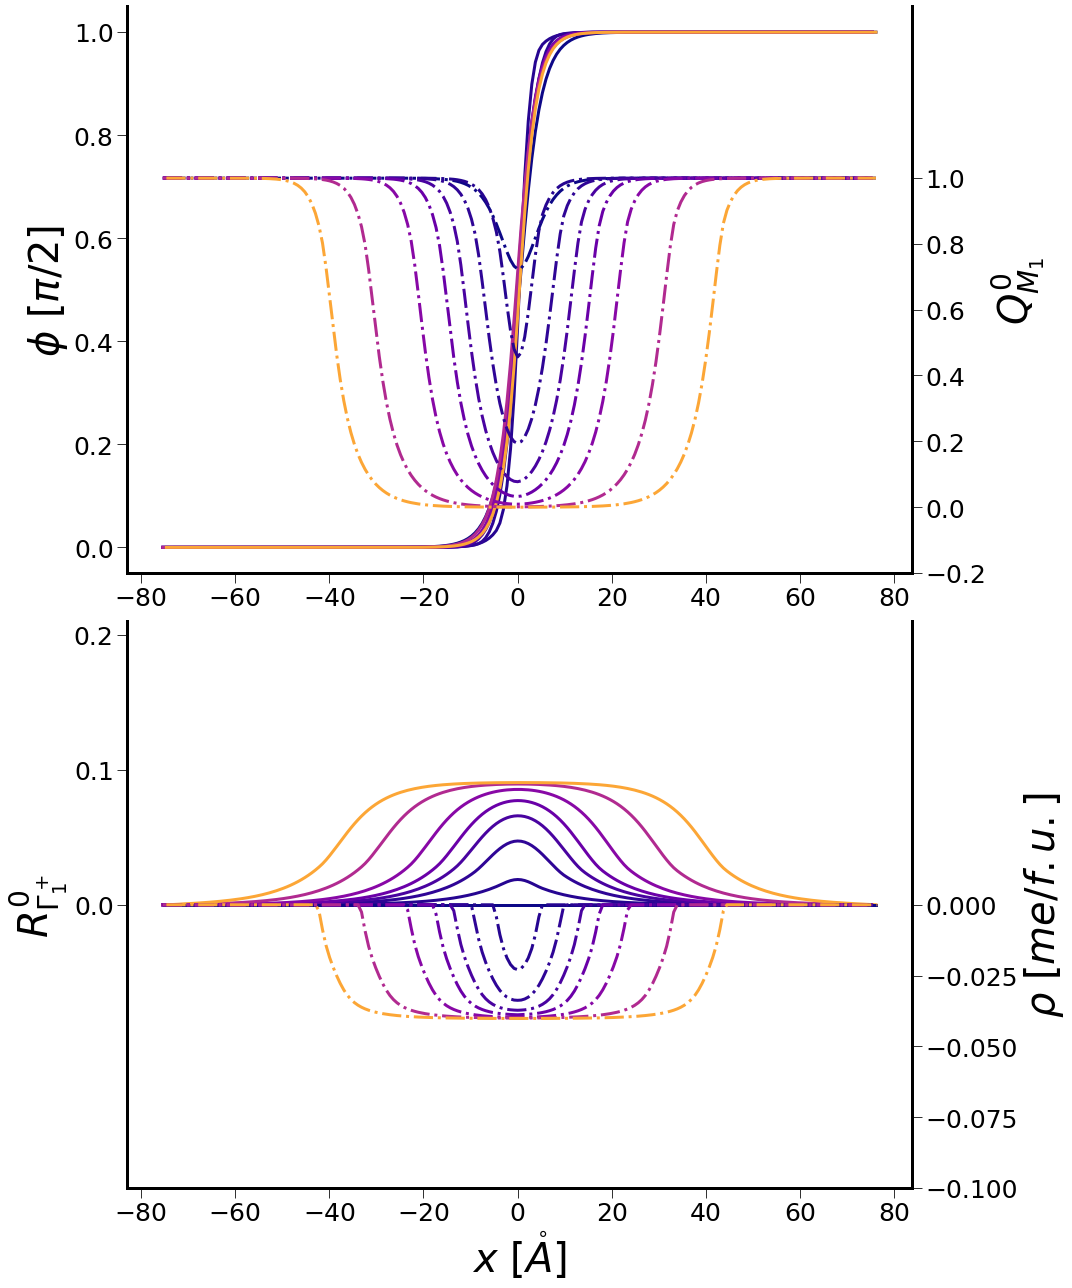

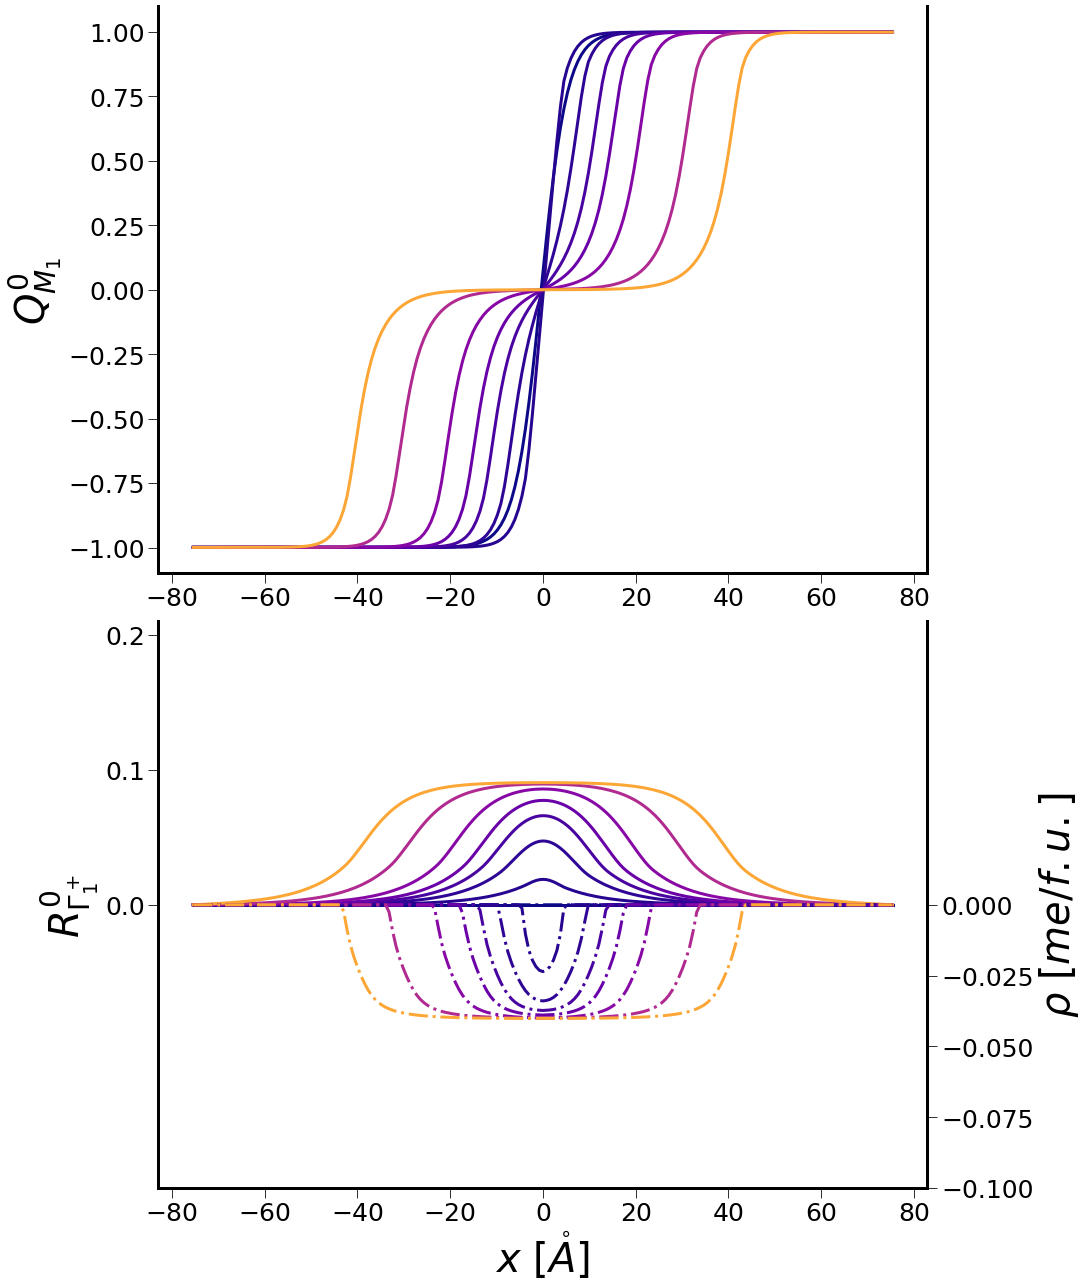

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys


#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:60% !important; }</style>"))

Neel_filenames = ["DATA/DOMAIN_WALLS/n201_e0.Neel_varQ_charge",
                  "DATA/DOMAIN_WALLS/n201_e002.Neel_varQ_charge",
                  "DATA/DOMAIN_WALLS/n201_e006.Neel_varQ_charge",
                  "DATA/DOMAIN_WALLS/n201_e01.Neel_varQ_charge",
                  "DATA/DOMAIN_WALLS/n201_e014.Neel_varQ_charge",
                  "DATA/DOMAIN_WALLS/n201_e02.Neel_varQ_charge",
                  "DATA/DOMAIN_WALLS/n201_e03.Neel_varQ_charge",
                  "DATA/DOMAIN_WALLS/n201_e04.Neel_varQ_charge"
                  ]

Ising_filenames = ["DATA/DOMAIN_WALLS/n201_e0.Ising_charge",
                  "DATA/DOMAIN_WALLS/n201_e002.Ising_charge",
                  "DATA/DOMAIN_WALLS/n201_e006.Ising_charge",
                  "DATA/DOMAIN_WALLS/n201_e01.Ising_charge",
                  "DATA/DOMAIN_WALLS/n201_e014.Ising_charge",
                  "DATA/DOMAIN_WALLS/n201_e02.Ising_charge",
                  "DATA/DOMAIN_WALLS/n201_e03.Ising_charge",
                  "DATA/DOMAIN_WALLS/n201_e04.Ising_charge"
                  ]


charges = [0, 2e-2, 3e-2, 6e-2, 1e-1, 1.4e-1, 2e-1, 4e-1]

#lowcp
#Neel_filenames = ["DATA/DOMAIN_WALLS/n201_e0.Neel_varQ_charge",
#                  "DATA/DOMAIN_WALLS/n201_e002_lowcp.Neel_varQ_charge",
#                  "DATA/DOMAIN_WALLS/n201_e006_lowcp.Neel_varQ_charge",
#                  "DATA/DOMAIN_WALLS/n201_e01_lowcp.Neel_varQ_charge",
#                  "DATA/DOMAIN_WALLS/n201_e014_lowcp.Neel_varQ_charge",
#                  "DATA/DOMAIN_WALLS/n201_e02_lowcp.Neel_varQ_charge",
#                  "DATA/DOMAIN_WALLS/n201_e04_lowcp.Neel_varQ_charge",
#                  "DATA/DOMAIN_WALLS/n201_e06_lowcp.Neel_varQ_charge"
#                 ]
#
#Ising_filenames = ["DATA/DOMAIN_WALLS/n201_e0.Ising_charge",
#                  "DATA/DOMAIN_WALLS/n201_e002_lowcp.Ising_charge",
#                  "DATA/DOMAIN_WALLS/n201_e006_lowcp.Ising_charge",
#                  "DATA/DOMAIN_WALLS/n201_e01_lowcp.Ising_charge",
#                  "DATA/DOMAIN_WALLS/n201_e014_lowcp.Ising_charge",
#                  "DATA/DOMAIN_WALLS/n201_e02_lowcp.Ising_charge",
#                  "DATA/DOMAIN_WALLS/n201_e04_lowcp.Ising_charge",
#                  "DATA/DOMAIN_WALLS/n201_e06_lowcp.Ising_charge"
#                  ]
#
#charges = [0, 2e-2, 6e-2, 1e-1, 1.4e-1, 2e-1, 4e-1, 6e-1]


#_________________________________________________________#

#open the files
Neel_files = []
Ising_files = []
for filename in Neel_filenames:
    Neel_files.append(np.loadtxt(filename))
    
for filename in Ising_filenames:
    Ising_files.append(np.loadtxt(filename))

volume = 7.3236460686 * 7.7495899200 * 7.3236460686
shifts = []
for file in Neel_files:
    #find the necessary shifts to center plots
    shift = np.argmin(file[:,2])
    shift = 0 - file[shift, 0]
    shifts.append(shift)

    #normalizing phi to pi/2 
    file[:,1] /= np.pi/2

    #normalizing q to bulk amplitude
    file[:,2] /= 0.749103
    
    #normalizing p to transition amplitude
    file[:,3] /= 0.878
    
    #converting rho to milli electrons/f.u.
    file[:,4] *= volume / (8*1000)


for file in Ising_files:
    #normalizing q to bulk amplitude
    file[:,1] /= 0.749103
    
    #normalizing p to transition amplitude
    file[:,2] /= 0.878

    #converting rho to milli electrons/f.u.
    file[:,3] *= volume / (8*1000)


colormap = plt.cm.plasma
norm = plt.Normalize(vmin = charges[0], vmax=charges[len(charges)-1]*1.25)

#____________________________________NEEL PLOTS_____________________________________#
#___________________________________________________________________________________#
plt.figure(1, figsize=[15,18])

#______________________PLOT PHI AND q______________________#
ax = plt.subplot(2,1,1)
ax2 = ax.twinx()
ax.tick_params(length=10)
ax2.tick_params(length=10)

for i, file in enumerate(Neel_files):
    ax.plot(file[:,0]+shifts[i], file[:,1], linewidth=3, color=colormap(norm(charges[i])))
    ax2.plot(file[:,0]+shifts[i], file[:,2], linestyle='-.', linewidth=3, color=colormap(norm(charges[i])))


ax2.set_ylim([-0.06,1.52])
ax.set_ylabel("$\phi \ [\pi/2]$", fontsize=40)
ax2.set_ylabel(r"$Q^{0}_{M_1}$", fontsize=40)

y2ticks = ax2.get_yticks()
ax2.set_yticks(y2ticks[0:7])


ax.tick_params(axis="both", length=10, labelsize=25)
ax2.tick_params(axis="both", length=10, labelsize=25)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['right'].set_linewidth(3)


#______________________PLOT p AND RHO______________________#
ax = plt.subplot(2,1,2)
ax2 = ax.twinx()
ax2.tick_params(length=10)

for i, file in enumerate(Neel_files):
    ax.plot(file[:,0]+shifts[i], file[:,3], linewidth=3, color=colormap(norm(charges[i])))
    ax2.plot(file[:,0]+shifts[i], file[:,4], linestyle='-.', linewidth=3, color=colormap(norm(charges[i])))

    
ax.set_ylim(-0.21, 0.21)
ax2.set_ylim(-0.1, 0.1)
ax.set_xlabel("$x \ [\mathring{A}]$", fontsize=40)
ax.set_ylabel(r"$R^{0}_{\Gamma_1^+}$", fontsize=40)
ax2.set_ylabel(r"$\rho \ [me/f.u.]$", fontsize=40)

ax.tick_params(axis="both", length=10, labelsize=25)
ax2.tick_params(axis="both", length=10, labelsize=25)
yticks = ax.get_yticks()
ax.set_yticks(yticks[3:-1])
y2ticks = ax2.get_yticks()
ax2.set_yticks(y2ticks[0:5])

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['right'].set_linewidth(3)

plt.tight_layout()
plt.savefig('FIGS/Neel_charge.eps', bbox_inches='tight')



#___________________________________ISING PLOTS_____________________________________#
#___________________________________________________________________________________#

plt.figure(2, figsize=[15,18])
ax = plt.subplot(2,1,1)


#______________________PLOT q and p______________________#
for i, file in enumerate(Ising_files):
    ax.plot(file[:,0], file[:,1], linewidth=3, color=colormap(norm(charges[i])))

ax.set_ylabel(r"$Q^{0}_{M_1}$", fontsize=40)

ax.tick_params(axis="both", length=10, labelsize=25)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['right'].set_linewidth(3)

#______________________PLOT RHO______________________#
ax = plt.subplot(2,1,2)
ax2 = ax.twinx()

for i, file in enumerate(Ising_files):
    ax.plot(file[:,0], file[:,2], linewidth=3, color=colormap(norm(charges[i])))
    ax2.plot(file[:,0], file[:,3], linestyle='-.', linewidth=3, color=colormap(norm(charges[i])))


ax.set_ylim(-0.21, 0.21)
ax2.set_ylim(-0.1, 0.1)
ax.set_ylabel(r"$R^{0}_{\Gamma_1^+}$", fontsize=40)
ax2.set_ylabel(r"$\rho \ [me/f.u.]$", fontsize=40)
ax.set_xlabel("$x \ [\mathring{A}]$", fontsize=40)

ax.tick_params(axis="both", length=10, labelsize=25)
ax2.tick_params(axis="both", length=10, labelsize=25)
yticks = ax.get_yticks()
ax.set_yticks(yticks[3:-1])
y2ticks = ax2.get_yticks()
ax2.set_yticks(y2ticks[0:5])

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['right'].set_linewidth(3)

plt.tight_layout()
plt.savefig('FIGS/Ising_charge.eps', bbox_inches='tight')

plt.show()